In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import subprocess

import os


# 데이터 전처리

In [2]:
save_date = "211119"

In [3]:
## python input data
path_1 = "../../../../01_data/국제/수집데이터_211105.xlsx" #국제 데이터
path_2 = "../../../../01_data/SVEIR/open_api_data~20210707.csv" # 격리해제 데이터

## r input data
path_r = "../../../../01_data/SVEIR/sveir_input_data.csv"

## output data
path_3 = "../../../../03_result/SVEIR/"+save_date+"/sveir_"+save_date+".csv"

## image
save_path = "../../../../04_image/"+save_date+"/"+save_date+"/MA/SVEIR/"

In [4]:
path = pd.DataFrame({'input':[path_r], 'output':[path_3]})
path

,input,output
0,../../../../01_data/SVEIR/sveir_input_data.csv,../../../../03_result/SVEIR/211119/sveir_21111...


In [5]:
path.to_csv("../../../../00_path/SVEIR/sveir_path.csv")

In [6]:
###누적확진자

data2= pd.read_excel(path_1, engine = "openpyxl",sheet_name ='확진자 데이터 통합' )
confirmed_data = data2.loc[:, ['tDate','South Korea']]

## 튀는 데이터...
confirmed_data.loc[confirmed_data['tDate']=='2021-09-26','South Korea']= 2771
confirmed_data.loc[confirmed_data['tDate']=='2021-10-04','South Korea']= 1673

confirmed_data['decideCnt'] = 0
for i in range(1,len(confirmed_data)):
    if confirmed_data.iloc[i,1] < 0:
        confirmed_data.iloc[i,2] = confirmed_data.iloc[i-1,2]
        confirmed_data.iloc[i,1] = 0
    else:
        confirmed_data.iloc[i,2] = confirmed_data.iloc[i,1]+confirmed_data.iloc[i-1,2]
# confirmed_data = confirmed_data.drop(columns = ['South Korea'],axis=1)
confirmed_data.tail(30)

,tDate,South Korea,decideCnt
598,2021-09-11,1865,271450
599,2021-09-12,1755,273205
600,2021-09-13,1433,274638
601,2021-09-14,1495,276133
602,2021-09-15,2079,278212
603,2021-09-16,1941,280153
604,2021-09-17,2008,282161
605,2021-09-18,2084,284245
606,2021-09-19,1909,286154
607,2021-09-20,1605,287759


In [7]:
##누적사망자

data2= pd.read_excel(path_1,engine = "openpyxl",sheet_name ='사망자 데이터 통합' )
death_data = data2.loc[:, ['tDate','South Korea']]
death_data['deathCnt'] = 0
for i in range(1,len(death_data)):
    if death_data.iloc[i,1] < 0:
        death_data.iloc[i,2] = death_data.iloc[i-1,2]
        death_data.iloc[i,1] = 0
    else:
        death_data.iloc[i,2] = death_data.iloc[i,1]+death_data.iloc[i-1,2]
death_data = death_data.drop(columns = ['South Korea'],axis=1)
death_data

,tDate,deathCnt
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0
...,...,...
623,2021-10-08,2560
624,2021-10-09,2566
625,2021-10-10,2581
626,2021-10-11,2589


In [8]:
###격리해제--> 격리해제는 이유엔데이터에 과거값이 없어서 openapi에서 가져옴


#############openapi #2021-02-01 ~ 2021-07-07
open_data = pd.read_csv(path_2)
open_data  =open_data.sort_values(by = ['stateDt'])

# 이유엔 데이터에 없는 2020-02-01 ~ 2021-01-31까지만 추출
open_data =open_data[0:366]
open_data

open_data= open_data.loc[:,['stateDt','clearCnt']] 
open_data.columns = ['tDate','SumQuarantineRelease']
open_data


#############이유엔데이터 #2021년 2월 1일~2021년 8월19일

data2= pd.read_excel(path_1, engine = "openpyxl",sheet_name ='지역별 격리 중, 격리해제, 사망자 현황' )
eun_data = data2.loc[:, ['tDate','SumQuarantineRelease']]



############# 이유엔과 open api 합침 -> 2020-02-01~2021-08-19
release_data= pd.concat([open_data,eun_data],axis=0)
release_data['tDate']=pd.to_datetime(release_data['tDate'])
release_data.reset_index(drop=True, inplace=True)
release_data

,tDate,SumQuarantineRelease
0,2020-02-01,1
1,2020-02-02,2
2,2020-02-03,0
3,2020-02-04,0
4,2020-02-05,1
...,...,...
748,2021-10-02,277092
749,2021-10-03,278847
750,2021-10-04,282669
751,2021-10-05,284197


In [9]:
### input_sveir에 데이터 합치기
input_sveir = pd.merge(confirmed_data,death_data,how = 'left',left_on='tDate',right_on='tDate')
input_sveir = pd.merge(input_sveir,release_data,how = 'left',left_on='tDate',right_on='tDate')


# nan을 제거 해야하나? 일단 제거
input_sveir = input_sveir.dropna(axis=0)    ########2020-02-01~2021-08-19
input_sveir

#### 그래프 그릴 확진자 데이터 저장 - data
data = input_sveir
input_sveir = input_sveir.drop(columns = ['South Korea'],axis=1)


### R 코드를 위해 칼럼명 바꾸기
input_sveir.columns = ['stateDt','decideCnt','deathCnt','clearCnt']
input_sveir

#R코드에 넣을 input데이터 저장
input_sveir.to_csv(path_r)
input_sveir

,stateDt,decideCnt,deathCnt,clearCnt
10,2020-02-01,11,0,1.0
11,2020-02-02,14,0,2.0
12,2020-02-03,14,0,0.0
13,2020-02-04,15,0,0.0
14,2020-02-05,18,0,1.0
...,...,...,...,...
756,2021-10-01,310727,2503,275576.0
757,2021-10-02,312974,2510,277092.0
758,2021-10-04,314647,2519,282669.0
759,2021-10-05,316222,2530,284197.0


# R 코드 실행

In [10]:
#####SVEIR
command = '/home/sysadm/anaconda3/envs/gil/bin/Rscript'
arg = '--vanilla'
path2script = '../../../../02_code/SVEIR/R/211102/r_sveir_211102.R'

retcode = subprocess.call([command, arg, path2script])


# 그래프 그리기

In [11]:
# #과거날짜 가져오기(그래프 그릴때 확진자만 필요)
# data= pd.read_excel('../../01_data/data_210818.xlsx', date_format='%Y-%m-%d',engine = "openpyxl",sheet_name ='확진자 데이터 통합' )
# data = data.loc[:, ['tDate','South Korea']]
# data= data.dropna(axis=0)#NAN값 제거 
# data = data[15:-11]
# data

In [12]:
#예측값 데이터 
df2 = pd.read_csv(path_3)
df2.drop(['Unnamed: 0','time','State'], axis=1, inplace=True)
df2

,value,Date,R
0,2287.907086,2021-10-07,1.2
1,2361.241959,2021-10-08,1.2
2,2428.307191,2021-10-09,1.2
3,2489.755335,2021-10-10,1.2
4,2546.170993,2021-10-11,1.2
...,...,...,...
590,1824.490852,2022-01-29,0.8
591,1815.555639,2022-01-30,0.8
592,1806.663949,2022-01-31,0.8
593,1797.815581,2022-02-01,0.8


In [13]:
df_1_2=df2[df2['R'] ==1.2]
df_1_1=df2[df2['R'] ==1.1]
df_1_=df2[df2['R'] ==1.]
df_0_9=df2[df2['R'] ==0.9]
df_0_8=df2[df2['R'] ==0.8]

df_date=df_1_2['Date'] #예측값 날짜

df_date_=data['tDate']#과거값 날짜 



x_ = data['tDate'].to_list()#과거값 x데이터
y_ = data['South Korea'].to_list()#과거값 y데이터 

In [14]:
x_2 = df_date.to_list() #예측값 x데이터

y_1_2 = df_1_2['value'].to_list()#Rt 1.2
y_1_1 = df_1_1['value'].to_list()
y_1_ = df_1_['value'].to_list()
y_0_9 = df_0_9['value'].to_list()
y_0_8 = df_0_8['value'].to_list()

x_2 = pd.to_datetime(x_2)
x_2

DatetimeIndex(['2021-10-07', '2021-10-08', '2021-10-09', '2021-10-10',
               '2021-10-11', '2021-10-12', '2021-10-13', '2021-10-14',
               '2021-10-15', '2021-10-16',
               ...
               '2022-01-24', '2022-01-25', '2022-01-26', '2022-01-27',
               '2022-01-28', '2022-01-29', '2022-01-30', '2022-01-31',
               '2022-02-01', '2022-02-02'],
              dtype='datetime64[ns]', length=119, freq=None)

In [15]:
x_ = pd.to_datetime(x_)
x_

DatetimeIndex(['2020-02-01', '2020-02-02', '2020-02-03', '2020-02-04',
               '2020-02-05', '2020-02-06', '2020-02-07', '2020-02-08',
               '2020-02-09', '2020-02-10',
               ...
               '2021-09-26', '2021-09-27', '2021-09-28', '2021-09-29',
               '2021-09-30', '2021-10-01', '2021-10-02', '2021-10-04',
               '2021-10-05', '2021-10-06'],
              dtype='datetime64[ns]', length=751, freq=None)

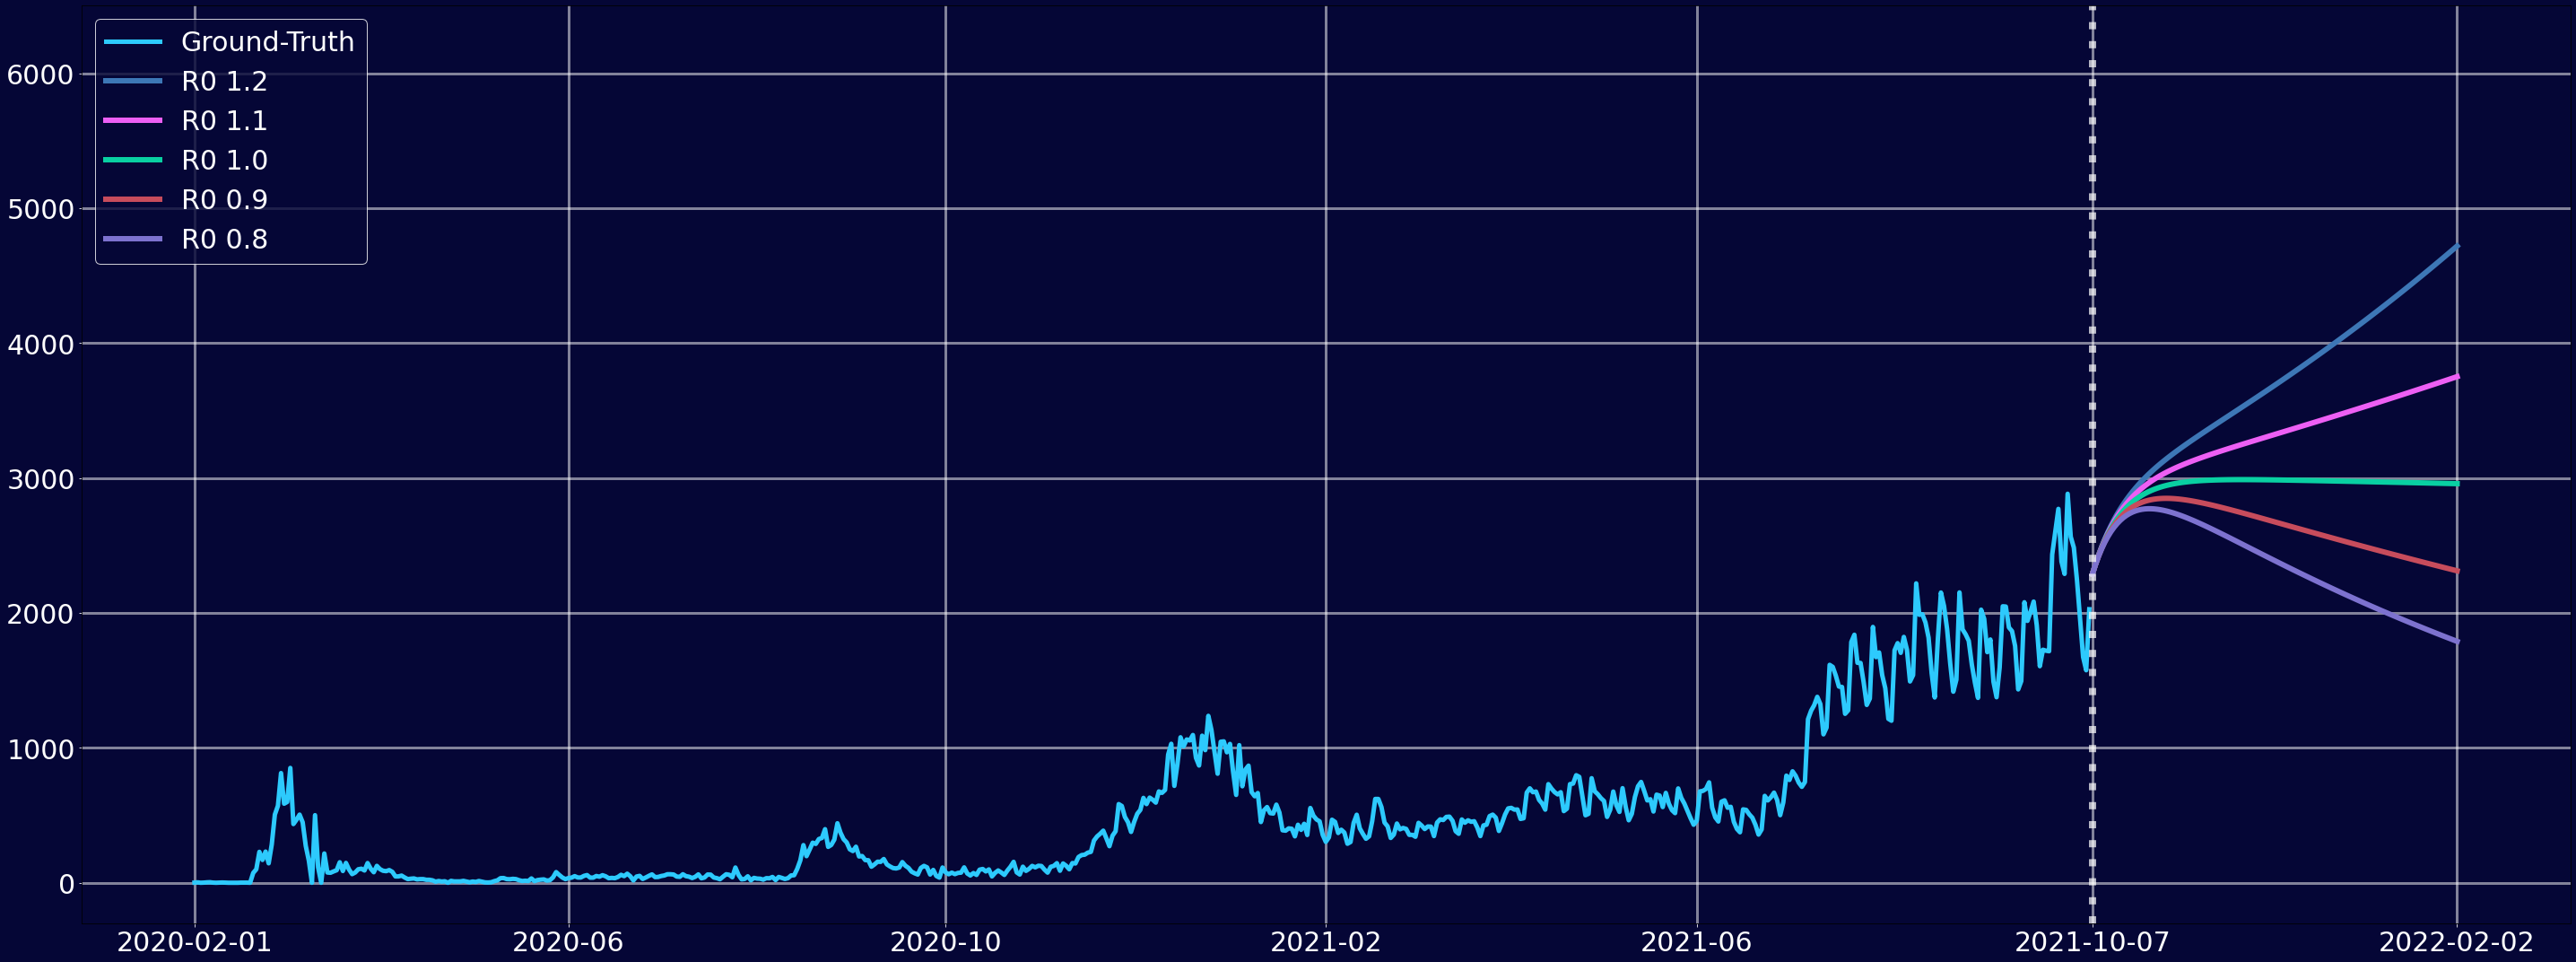

In [16]:
from matplotlib import dates as mdates

y_lim = [-300,6500]


################스타일#######################################
fig = plt.figure(figsize=(40,15)) ## 캔버스 생성
fig.patch.set_facecolor('#050636') 
plt.rcParams['text.color'] = 'w'
plt.rcParams['xtick.color'] = 'w'
plt.rcParams['ytick.color'] = 'w'
plt.rcParams['axes.spines.left'] = True
plt.rcParams['axes.facecolor']='#050636'
plt.grid(color='w', linestyle='-', linewidth=3,alpha = 0.5)
plt.gca().spines['bottom'].set_visible(True) #위 테두리
plt.gca().spines['left'].set_visible(True) #왼쪽 테두리
#############################################################


# ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성
#ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))


################1. 실제 값 ###################################
plt.plot(x_,y_,color = '#2dcafd', linewidth = 5) ## 선그래프 생성

################2. 예측 값 ###################################
plt.plot(x_2,y_1_2,linewidth = 6,color= '#3d77b6') 
plt.plot(x_2,y_1_1,linewidth = 6,color= '#ed5ff4')
plt.plot(x_2,y_1_,linewidth = 6,color= '#09d0a2') 
plt.plot(x_2,y_0_9,linewidth = 6,color= '#c74c5c')
plt.plot(x_2,y_0_8,linewidth = 6,color= '#7d72cf')

################3. 범례 ###################################
plt.legend(['Ground-Truth', 'R0 1.2','R0 1.1','R0 1.0','R0 0.9','R0 0.8'],fontsize=30,loc = 'upper left', edgecolor = 'w',facecolor = '#050636')


################4. 수직선 ###################################
plt.axvline(x=x_2[0],linestyle = ':',color='w',linewidth=8, alpha = 0.7)

################5. 제목 ###################################
# plt.title('SVEIR',fontsize=50)
plt.ylim(y_lim)
plt.xticks([x_[0],'2020-06-01','2020-10-01','2021-02-01','2021-06-01',x_2[0],x_2[-1]],[str(x_[0])[:10],'2020-06','2020-10','2021-02','2021-06',str(x_2[0])[:10],str(x_2[-1])[:10]],fontsize=30)
plt.yticks(fontsize = 30)
plt.tight_layout()  
# plt.savefig(save_path+"I/"+'20220202_'+'None_None_None',dpi=300)
plt.show()